In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import inspect
import seaborn as sns
import os

import perturbseq as perturb

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


In [2]:
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-07-09'
FIGS=DATA+'/Figures/'

PROTEIN='TP53'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/'+PROTEIN
counts=20000
pref=SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)

In [3]:
adata=sc.read(pref+'.h5ad',cache=False)
adata

Only considering the two last: ['.counts_per_cell20000', '.h5ad'].
Only considering the two last: ['.counts_per_cell20000', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 24839 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [4]:
#get the original counts
results_prefix=DATA+'/'+PROTEIN+'/processed_data/A549.'+PROTEIN
adata_all=sc.read(results_prefix+'.raw.h5ad')
adata_all

Only considering the two last: ['.raw', '.h5ad'].
Only considering the two last: ['.raw', '.h5ad'].


AnnData object with n_obs × n_vars = 192000 × 33694 
    obs: 'batch'

In [5]:
sc.pp.filter_cells(adata_all, min_genes=200)
sc.pp.filter_genes(adata_all, min_cells=3)

filtered out 3429 cells that have less than 200 genes expressed
filtered out 8855 genes that are detected in less than 3 cells


In [6]:
adata_all.obs['n_counts'] = adata_all.X.sum(axis=1).A1
max(adata_all.obs['n_counts'])

126070.0

In [7]:
import copy
adata_all.obs['n_counts_downsampled'] = adata_all.X.sum(axis=1).A1
adata_all.obs['n_counts_original'] = copy.deepcopy(adata_all.obs['n_counts'])

In [8]:
adata_all.obs_names[:3]

Index(['AAACCTGAGAATGTTG-1-0', 'AAACCTGAGCTAGCCC-1-0', 'AAACCTGAGGTCGGAT-1-0'], dtype='object')

In [9]:
protein_obs=[]
batch_num=[]
new_obsnames=[]

for i in range(adata.n_obs):
    to_add=0
    protein_here=PROTEIN
    if protein_here=='KRAS':
        to_add=32
    new_obsnames.append(str(adata.obs_names[i].split('-')[0]))
    
adata.obs_names=new_obsnames

In [10]:
protein_obs=[]
batch_num=[]
new_obsnames=[]

for i in range(adata_all.n_obs):
    to_add=0
    protein_here=PROTEIN
    if protein_here=='KRAS':
        to_add=32
    batch_here=int(adata_all.obs_names[i].split('-1-')[1])+to_add
    protein_obs.append(protein_here)
    batch_num.append(batch_here)
    new_obsnames.append('ch'.join(adata_all.obs_names[i].split('-1-')))
    
adata_all.obs_names=new_obsnames

In [11]:
adata.write(pref+'.raw.preanno.h5ad')

In [12]:
adata=sc.read(pref+'.raw.preanno.h5ad')
adata

Only considering the two last: ['.preanno', '.h5ad'].
Only considering the two last: ['.preanno', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 24839 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [13]:
adata.obs['n_counts_original']=adata_all[adata.obs_names,:].obs['n_counts_original']

In [14]:
#add anno
PROTEIN='TP53'
cells2guide_file='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-07-09/'+PROTEIN+'/processed_data/A549.'+PROTEIN+'.anno.vbc_TPTfiltered1.0_umi_counts.mut_std.gz'
perturb.io.read_perturbations_csv(adata,
                       cell2guide_csv=cells2guide_file,
                      guide2gene_csv=None,
                      sep=',')

annotated cells: 252759
adata cells: 162314 | 85.0 percent annotated


In [15]:
adata

AnnData object with n_obs × n_vars = 162314 × 24839 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt', 'n_counts_original', 'guide', 'guide.compact', 'K132R', 'H193L', 'Y236C', 'P58R', 'P36P', 'WT', 'T312S', 'V216M', 'G360V', 'R337C', 'G244C', 'R337L', 'R273H', 'G245V', 'S127F', 'Q5R', 'P151S', 'P250L', 'Y220C', 'R248L', 'T170T', 'R248W', 'G105C', 'C238Y', 'G245C', 'P301P', 'S241C', 'H214R', 'T118T', 'R249S', 'C141Y', 'S366A', 'Y163C', 'V272M', 'C275Y', 'V157F', 'M246V', 'R280T', 'V173L', 'G266V', 'I195T', 'Y205C', 'P153P', 'R249M', 'R158L', 'V173M', 'R158R', 'G245D', 'Y107H', 'E271K', 'E339K', 'P278L', 'P278S', 'H179Y', 'E285K', 'K132N', 'L344L', 'G266R', 'P47S', 'P152L', 'D21D', 'P47P', 'P222P', 'R273L', 'M237I', 'A159P', 'R110L', 'V31I', 'Y234C', 'C238F', 'R280K', 'P359P', 'R158H', 'L194R', 'V272L', 'C135F', 'S241F', 'H193R', 'R273C', 'C242F', 'C176Y', 'H193Y', 'P295P', 'V216V', 'C277F', 'C275F', '

In [16]:
adata.write(pref+'.raw.anno.h5ad')

... storing 'guide' as categorical
... storing 'guide.compact' as categorical


In [32]:
adata=sc.read(pref+'.raw.anno.h5ad')
adata

Only considering the two last: ['.anno', '.h5ad'].
Only considering the two last: ['.anno', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 24839 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt', 'n_counts_original', 'guide', 'guide.compact', 'K132R', 'H193L', 'Y236C', 'P58R', 'P36P', 'WT', 'T312S', 'V216M', 'G360V', 'R337C', 'G244C', 'R337L', 'R273H', 'G245V', 'S127F', 'Q5R', 'P151S', 'P250L', 'Y220C', 'R248L', 'T170T', 'R248W', 'G105C', 'C238Y', 'G245C', 'P301P', 'S241C', 'H214R', 'T118T', 'R249S', 'C141Y', 'S366A', 'Y163C', 'V272M', 'C275Y', 'V157F', 'M246V', 'R280T', 'V173L', 'G266V', 'I195T', 'Y205C', 'P153P', 'R249M', 'R158L', 'V173M', 'R158R', 'G245D', 'Y107H', 'E271K', 'E339K', 'P278L', 'P278S', 'H179Y', 'E285K', 'K132N', 'L344L', 'G266R', 'P47S', 'P152L', 'D21D', 'P47P', 'P222P', 'R273L', 'M237I', 'A159P', 'R110L', 'V31I', 'Y234C', 'C238F', 'R280K', 'P359P', 'R158H', 'L194R', 'V272L', 'C135F', 'S241F', 'H193R', 'R273C', 'C242F', 'C176Y', 'H193Y', 'P295P', 'V216V', 'C277F', 'C275F', '

In [33]:
variants=perturb.util.get_perturbations(adata,compact=True)

In [34]:
print(variants)

['A159P', 'A159V', 'A83V', 'C135F', 'C135Y', 'C141Y', 'C176F', 'C176Y', 'C238F', 'C238Y', 'C242F', 'C275F', 'C275Y', 'C277F', 'D21D', 'E271K', 'E285K', 'E286K', 'E2E', 'E339K', 'G105C', 'G154V', 'G244C', 'G245C', 'G245D', 'G245S', 'G245V', 'G266E', 'G266R', 'G266V', 'G360V', 'H179R', 'H179Y', 'H193L', 'H193R', 'H193Y', 'H214R', 'I195T', 'K132N', 'K132R', 'L194R', 'L344L', 'M237I', 'M246V', 'P151S', 'P152L', 'P153P', 'P222P', 'P250L', 'P278L', 'P278S', 'P295P', 'P301P', 'P359P', 'P36P', 'P47P', 'P47S', 'P58R', 'Q5R', 'R110L', 'R158H', 'R158L', 'R158R', 'R175H', 'R213Q', 'R248L', 'R248W', 'R249M', 'R249S', 'R273C', 'R273H', 'R273L', 'R280K', 'R280T', 'R282W', 'R337C', 'R337L', 'S127F', 'S241C', 'S241F', 'S366A', 'T118T', 'T170T', 'T312S', 'V157F', 'V173L', 'V173M', 'V216M', 'V216V', 'V272L', 'V272M', 'V31I', 'WT', 'Y107H', 'Y163C', 'Y205C', 'Y220C', 'Y234C', 'Y236C']


In [35]:
adata

AnnData object with n_obs × n_vars = 162314 × 24839 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt', 'n_counts_original', 'guide', 'guide.compact', 'K132R', 'H193L', 'Y236C', 'P58R', 'P36P', 'WT', 'T312S', 'V216M', 'G360V', 'R337C', 'G244C', 'R337L', 'R273H', 'G245V', 'S127F', 'Q5R', 'P151S', 'P250L', 'Y220C', 'R248L', 'T170T', 'R248W', 'G105C', 'C238Y', 'G245C', 'P301P', 'S241C', 'H214R', 'T118T', 'R249S', 'C141Y', 'S366A', 'Y163C', 'V272M', 'C275Y', 'V157F', 'M246V', 'R280T', 'V173L', 'G266V', 'I195T', 'Y205C', 'P153P', 'R249M', 'R158L', 'V173M', 'R158R', 'G245D', 'Y107H', 'E271K', 'E339K', 'P278L', 'P278S', 'H179Y', 'E285K', 'K132N', 'L344L', 'G266R', 'P47S', 'P152L', 'D21D', 'P47P', 'P222P', 'R273L', 'M237I', 'A159P', 'R110L', 'V31I', 'Y234C', 'C238F', 'R280K', 'P359P', 'R158H', 'L194R', 'V272L', 'C135F', 'S241F', 'H193R', 'R273C', 'C242F', 'C176Y', 'H193Y', 'P295P', 'V216V', 'C277F', 'C275F', '

In [36]:
PROTEIN='TP53'
cells2guide_file='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-07-09/'+PROTEIN+'/processed_data/A549.'+PROTEIN+'.anno.vbc_TPTfiltered1.0_umi_counts.mut_std.gz'
cell2guide=pd.read_csv(cells2guide_file)
cell2guide.head()

,V216V,P301P,Q5R,Y107H,A83V,R248L,H214R,P152L,V173L,R158R,...,R249S,R248W,C135F,R280K,K132N,G154V,S127F,Y220C,C275F,cell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ACGATGTGTCAACTGTch3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ATTGGACTCGAGGTAGch15
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GTCATTTCAATGTAAGch31
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,ACATGGTTCGCTTAGAch5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AGATCTGTCGCCTGAGch21


In [37]:
vbc_counts_summed=cell2guide.loc[:,variants].sum(axis=1)
vbc_counts_summed.index=cell2guide['cell']
print(vbc_counts_summed.head())

cell
ACGATGTGTCAACTGTch3     7.0
ATTGGACTCGAGGTAGch15    6.0
GTCATTTCAATGTAAGch31    1.0
ACATGGTTCGCTTAGAch5     1.0
AGATCTGTCGCCTGAGch21    3.0
dtype: float64


In [38]:
vbc_norm=[]
for i in range(adata.n_obs):
    vbc_count=0
    cell=adata.obs_names[i]
    if cell in vbc_counts_summed.index:
        vbc_count=vbc_counts_summed[cell]
    vbc_norm.append(1.0*vbc_count/adata.obs['n_counts_original'][i])

In [39]:
adata.obs['vbc_norm']=vbc_norm

(0.0, 1000.0)

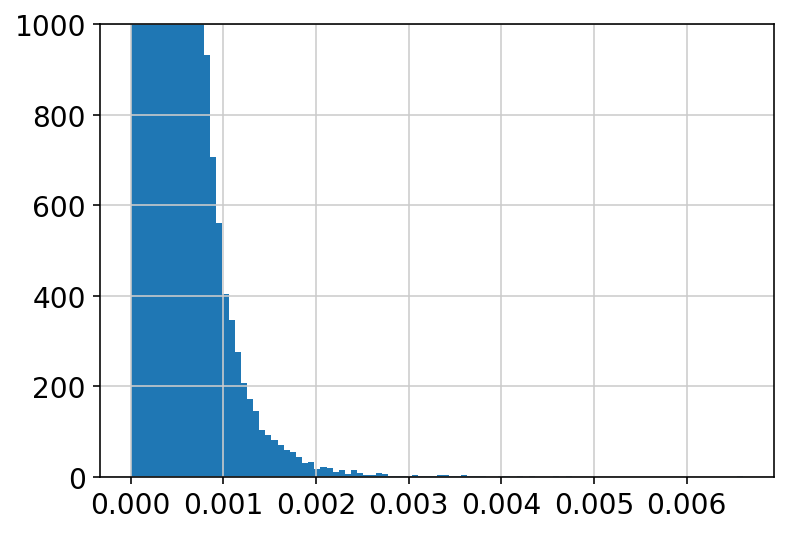

In [40]:
plt.hist(adata.obs['vbc_norm'],100)
plt.ylim(0,1000)

In [41]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:07)


In [42]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=4, min_disp=0.5)

extracting highly variable genes
    finished (0:00:33)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [43]:
np.sum(adata.var['highly_variable'])

1221

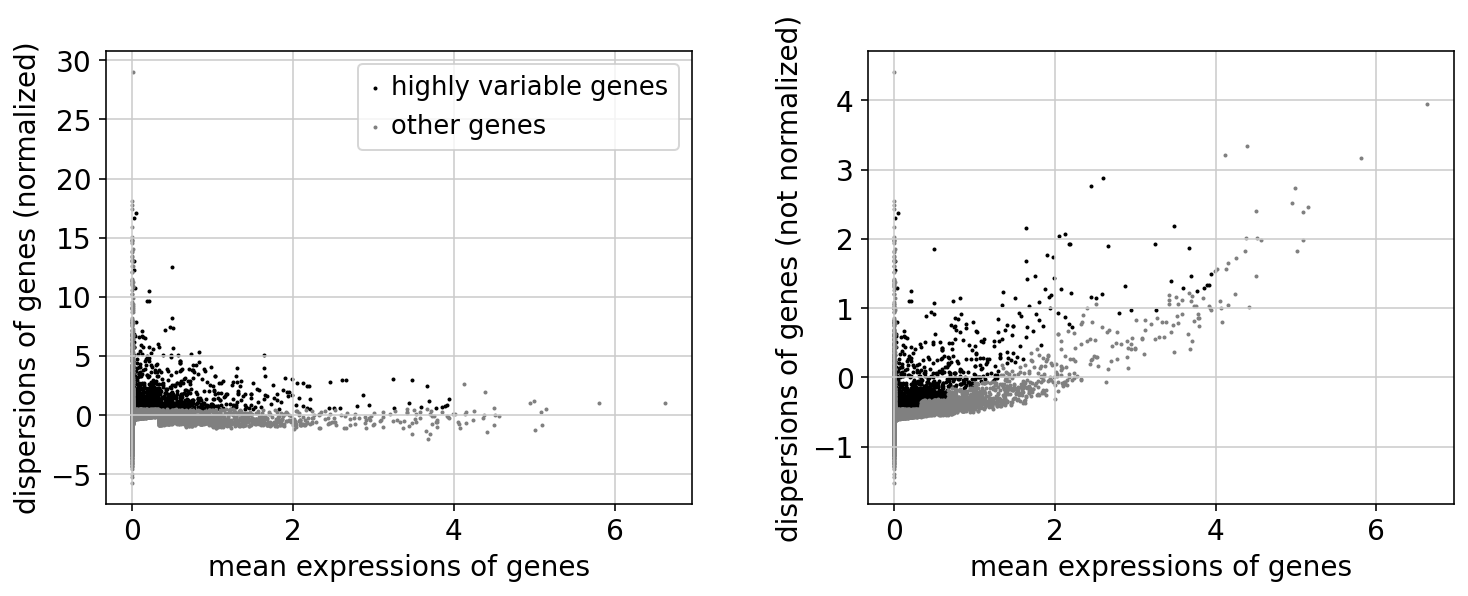

In [44]:
sc.pl.highly_variable_genes(adata)

In [45]:
adata.raw = adata

In [46]:
adata = adata[:, adata.var['highly_variable']]
adata

View of AnnData object with n_obs × n_vars = 162314 × 1221 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt', 'n_counts_original', 'guide', 'guide.compact', 'K132R', 'H193L', 'Y236C', 'P58R', 'P36P', 'WT', 'T312S', 'V216M', 'G360V', 'R337C', 'G244C', 'R337L', 'R273H', 'G245V', 'S127F', 'Q5R', 'P151S', 'P250L', 'Y220C', 'R248L', 'T170T', 'R248W', 'G105C', 'C238Y', 'G245C', 'P301P', 'S241C', 'H214R', 'T118T', 'R249S', 'C141Y', 'S366A', 'Y163C', 'V272M', 'C275Y', 'V157F', 'M246V', 'R280T', 'V173L', 'G266V', 'I195T', 'Y205C', 'P153P', 'R249M', 'R158L', 'V173M', 'R158R', 'G245D', 'Y107H', 'E271K', 'E339K', 'P278L', 'P278S', 'H179Y', 'E285K', 'K132N', 'L344L', 'G266R', 'P47S', 'P152L', 'D21D', 'P47P', 'P222P', 'R273L', 'M237I', 'A159P', 'R110L', 'V31I', 'Y234C', 'C238F', 'R280K', 'P359P', 'R158H', 'L194R', 'V272L', 'C135F', 'S241F', 'H193R', 'R273C', 'C242F', 'C176Y', 'H193Y', 'P295P', 'V216V', 'C277F', 'C2

In [49]:
np.max(adata.obs['n_counts'])

50000.0

In [48]:
adata.obs['pct_counts_mt']

AAACCTGAGAATGTTGch0      5.726716
AAACCTGAGCTAGCCCch0     10.239728
AAACCTGAGGTCGGATch0      6.058505
AAACCTGAGGTGCAACch0      7.503206
AAACCTGAGTCCGTATch0      6.777122
AAACCTGAGTGCGTGAch0      9.390747
AAACCTGAGTGGAGAAch0      9.120467
AAACCTGCAACTGCTAch0      3.752178
AAACCTGCAAGACACGch0      8.090803
AAACCTGCACAGACAGch0      7.172908
AAACCTGCATTCACTTch0      8.174340
AAACCTGGTAAACGCGch0      8.101901
AAACCTGTCCTATGTTch0      8.183872
AAACCTGTCGTCACGGch0      6.270452
AAACGGGCACCGATATch0      7.142013
AAACGGGCACGCTTTCch0      5.345678
AAACGGGGTAAACCTCch0      8.081220
AAACGGGGTACCAGTTch0      8.576947
AAACGGGTCAAGGTAAch0      4.571774
AAACGGGTCATCTGTTch0      7.627943
AAACGGGTCTTACCGCch0      7.337556
AAAGATGAGAATGTTGch0      5.557710
AAAGATGAGAGGGCTTch0      8.134241
AAAGATGCAACTGCTAch0      7.927771
AAAGATGCATCCGTGGch0      4.846707
AAAGATGGTAGAGCTGch0      8.672888
AAAGATGGTCCCTACTch0      6.428401
AAAGATGGTCTCCATCch0      4.322258
AAAGATGGTGACCAAGch0      7.319894
AAAGATGTCCTGCT

In [50]:
#batch correct
to_regress_out=[]
for batch in set(adata.obs['batch']):
    batch_vector=np.zeros((1,len(adata.obs_names)))
    for cell_idx in range(len(adata.obs_names)):
        if adata.obs['batch'][cell_idx]==batch:
            batch_vector[0,cell_idx]=1.0
    batchname='batch_num'+batch
    adata.obs[batchname]=batch_vector[0,:]
    to_regress_out.append(batchname)

#add total counts and percent mito to the stuff to regress out
#also regress out the vbc
to_regress_out.append('n_counts_original')
to_regress_out.append('pct_counts_mt')
to_regress_out.append('vbc_norm')
sc.pp.regress_out(adata,to_regress_out)

Trying to set attribute `.obs` of view, copying.


regressing out ['batch_num4', 'batch_num6', 'batch_num9', 'batch_num2', 'batch_num15', 'batch_num30', 'batch_num23', 'batch_num11', 'batch_num22', 'batch_num5', 'batch_num29', 'batch_num0', 'batch_num24', 'batch_num12', 'batch_num14', 'batch_num18', 'batch_num3', 'batch_num25', 'batch_num27', 'batch_num17', 'batch_num13', 'batch_num19', 'batch_num8', 'batch_num21', 'batch_num16', 'batch_num10', 'batch_num28', 'batch_num20', 'batch_num7', 'batch_num1', 'batch_num31', 'batch_num26', 'n_counts_original', 'pct_counts_mt', 'vbc_norm']
    sparse input is densified and may lead to high memory use
    finished (1:36:38)


In [51]:
adata.write(pref+'.batch_regr.h5ad')

In [53]:
adata=sc.read(pref+'.batch_regr.h5ad')
adata

Only considering the two last: ['.batch_regr', '.h5ad'].
Only considering the two last: ['.batch_regr', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 1221 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt', 'n_counts_original', 'guide', 'guide.compact', 'K132R', 'H193L', 'Y236C', 'P58R', 'P36P', 'WT', 'T312S', 'V216M', 'G360V', 'R337C', 'G244C', 'R337L', 'R273H', 'G245V', 'S127F', 'Q5R', 'P151S', 'P250L', 'Y220C', 'R248L', 'T170T', 'R248W', 'G105C', 'C238Y', 'G245C', 'P301P', 'S241C', 'H214R', 'T118T', 'R249S', 'C141Y', 'S366A', 'Y163C', 'V272M', 'C275Y', 'V157F', 'M246V', 'R280T', 'V173L', 'G266V', 'I195T', 'Y205C', 'P153P', 'R249M', 'R158L', 'V173M', 'R158R', 'G245D', 'Y107H', 'E271K', 'E339K', 'P278L', 'P278S', 'H179Y', 'E285K', 'K132N', 'L344L', 'G266R', 'P47S', 'P152L', 'D21D', 'P47P', 'P222P', 'R273L', 'M237I', 'A159P', 'R110L', 'V31I', 'Y234C', 'C238F', 'R280K', 'P359P', 'R158H', 'L194R', 'V272L', 'C135F', 'S241F', 'H193R', 'R273C', 'C242F', 'C176Y', 'H193Y', 'P295P', 'V216V', 'C277F', 'C275F', 'G

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:01:09)


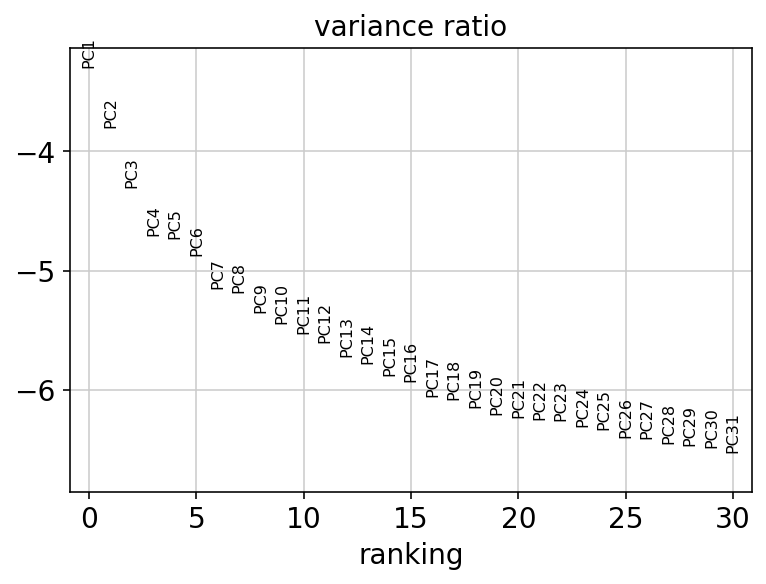

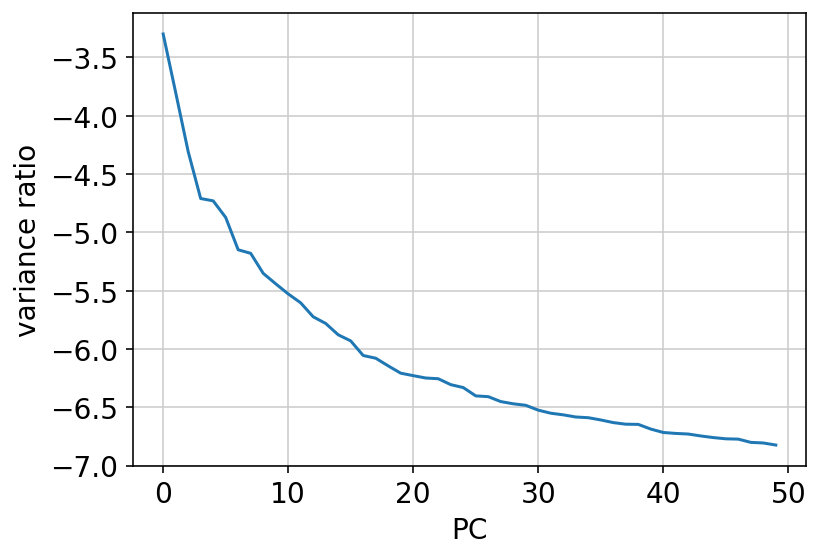

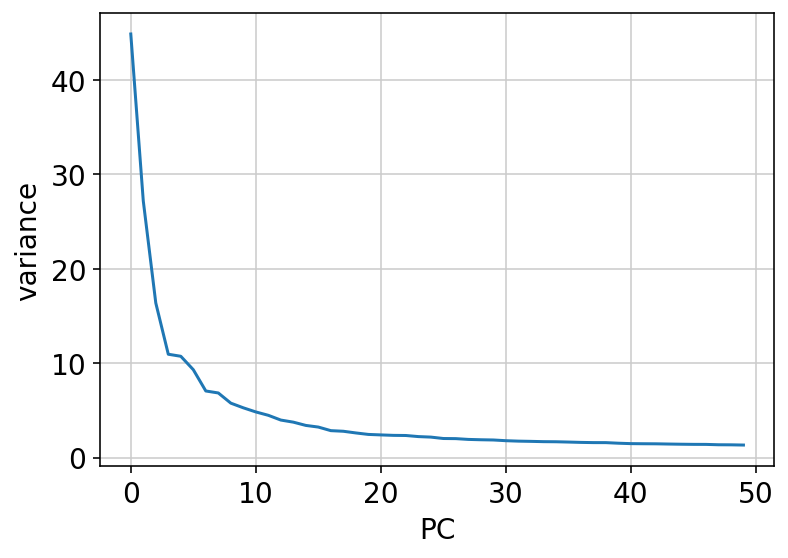

In [54]:
#zscores
sc.pp.scale(adata, max_value=10)

#PCs
sc.tl.pca(adata,svd_solver='arpack',n_comps=50)
adata.obsm['X_pca'] *= -1
sc.pl.pca_variance_ratio(adata, log=True)

plt.plot(np.log(adata.uns['pca']['variance_ratio']))
plt.xlabel('PC')
plt.ylabel('variance ratio')
plt.show()
plt.plot(adata.uns['pca']['variance'])
plt.xlabel('PC')
plt.ylabel('variance')
plt.show()

In [55]:
sc.pp.neighbors(adata, n_neighbors=15) #15 neighbors is default
sc.tl.louvain(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:05:45)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:02:45)


In [56]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:08:27)


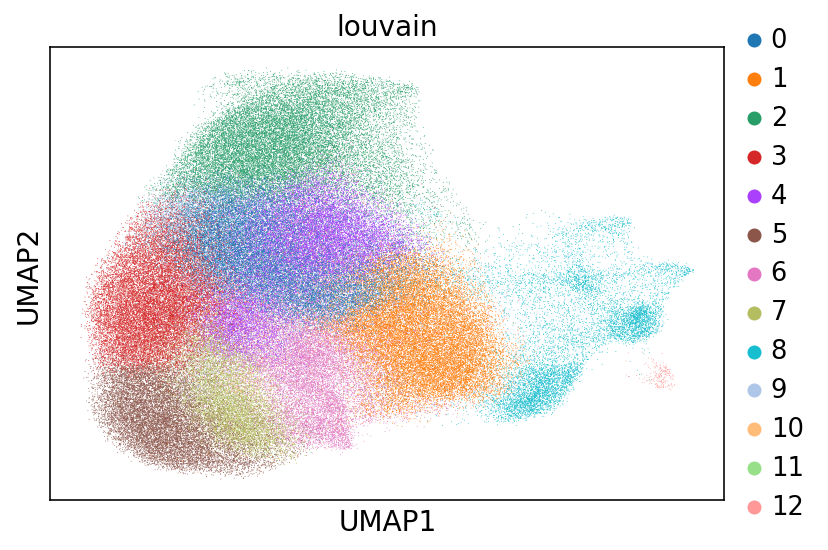

In [57]:
sc.pl.umap(adata,color=['louvain'])

In [58]:
adata.write(pref+'.analysis.h5ad')